## 2. What is the difference in expressionlevel at different timepoints for those genes that are a DEG when comparing the mutant to the background?

We found that, especially at T1, many genes are DE when comparing Siz1.2 and 1xB mutants to the background.

Here we plot the expression level of these DEGs for the mutant compared to the background, at different timepoints. 
Moreover, to determine the effect of the deletion/knockdown of genes that are involved in growth, we highlight putative targets of TFs PIF4, BZR1 and ARF6.


### 2.1 Compare expression level of genes that are a DEG in time in the background
In the heatmap, it seems as though the expression level of Pad4 DEGs is less extreme in the mutants. Let's quickly double-check using a scatterplot.

In [1]:
# general stuff:
#imports
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn3, venn3_circles

import sys, pickle, os
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from scipy import stats

rdname = 'Pad4_NEW/reanalysisTime/relativeToPrevTimepoint/'

#names
strains     = ['pad4', 'siz1-2_pad4', '1xB_pad4']
timepoints  = ['T0','T1','T2']

# allDEGs is set of probe_ids that are DE (q <= 0.01) when comparing T0 to T1 or T2 and T1 to T2
# pickled in 1.heatmap_bkgrDEGs_inMutant 
allDEGs = pickle.load(open('Pad4_NEW/DEGs_in_Pad4/pickles/ALL.probes_as_set')) 

#data
df   = pd.read_csv('Pad4_NEW/average_expression.tab', sep = '\t') #file made in 1.heatmap_bkgrDEGs_inMutant

# dir to save plots in 
os.system('mkdir -p '+rdname+'scatterplots/')



0

Let's first reproduce the last Figures from 1.heatmap_bkgrDEGs_inMutant: scatterplots of differenc ein expression when comparing two consecutive timepoints, in the mutant versus the background, for those genes that are a DE in time in backrgound.

siz1-2_pad4


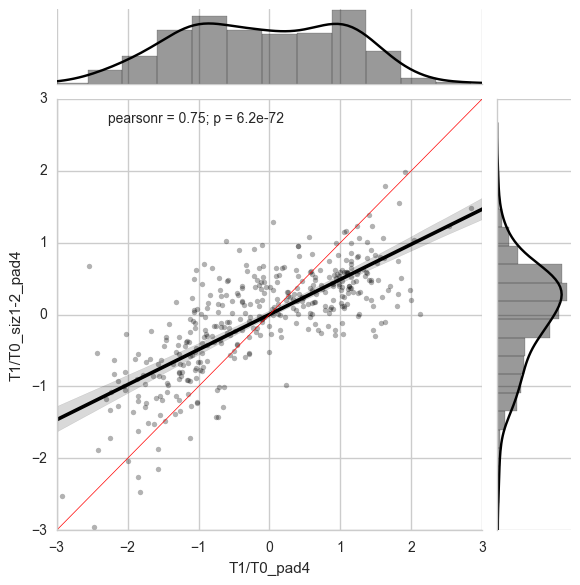

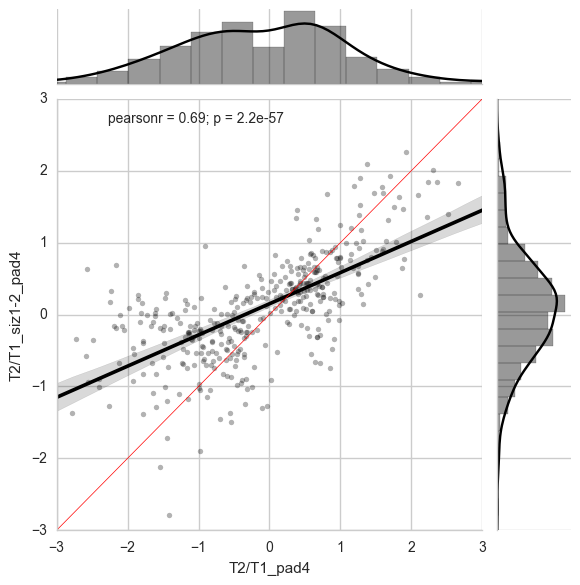

1xB_pad4


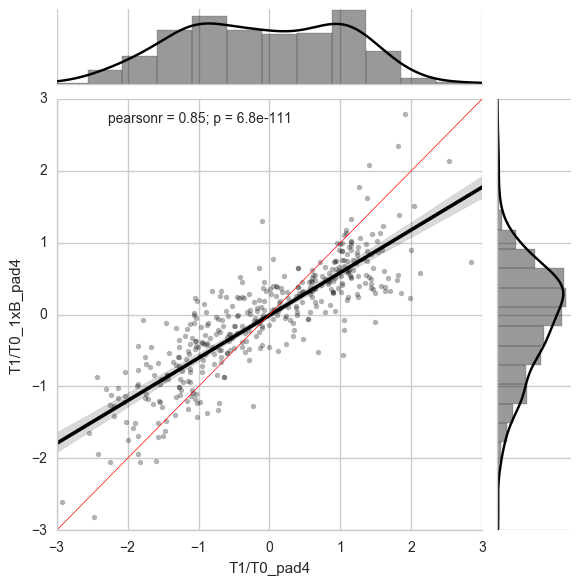

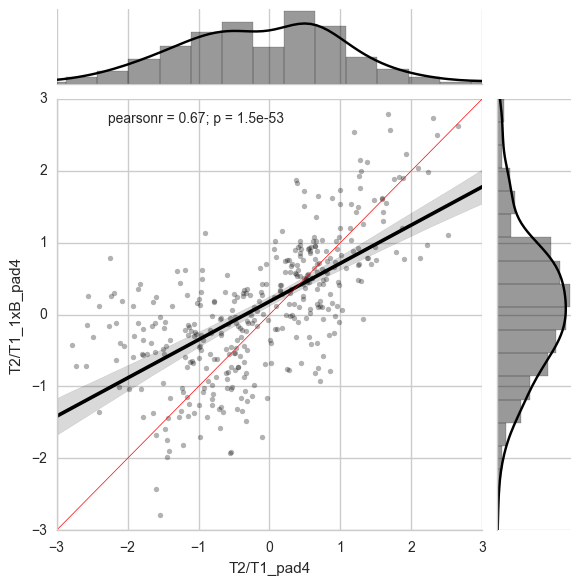

In [2]:
##########
#  reproduce scatterplots from 1.heatmap_bkgrDEGs_inMutant
##########
BKGR = strains[0]
DEGs = df[df.probeset_id.isin(allDEGs)] 
# put all data in a single dataFrame
all_rel_data = pd.DataFrame({'probeset_id': DEGs['probeset_id'], 'T1/T0_'+BKGR: DEGs['T1_'+BKGR]-DEGs['T0_'+BKGR],\
                             'T2/T1_'+BKGR: DEGs['T2_'+BKGR]-DEGs['T1_'+BKGR],\
                             'T1/T0_'+strains[1]: DEGs['T1_'+strains[1]]-DEGs['T0_'+strains[1]],\
                             'T2/T1_'+strains[1]: DEGs['T2_'+strains[1]]-DEGs['T1_'+strains[1]],\
                             'T1/T0_'+strains[2]: DEGs['T1_'+strains[2]]-DEGs['T0_'+strains[2]],\
                             'T2/T1_'+strains[2]: DEGs['T2_'+strains[2]]-DEGs['T1_'+strains[2]]})
                                

sns.set_style("whitegrid")
for S in strains[1:]:
    print S
    plt.figure()
    g = sns.jointplot(all_rel_data['T1/T0_'+BKGR], all_rel_data['T1/T0_'+S], \
                      kind="reg", color="black", scatter_kws = {'s':15, 'alpha':0.3})
    g.ax_joint.set_xlim(-3, 3)
    g.ax_joint.set_ylim(-3, 3)
    
    (xmin,xmax) = g.ax_joint.get_xlim()
    x = np.arange(xmin,xmax+1)
    g.ax_joint.plot(x, 1*x, color = 'red', linewidth=0.5)
    #plt.savefig(rdname+'scatterplots/T1T0_'+BKGR+'-'+S+'.scatter.eps')
    plt.show()
    plt.close()
    
    plt.figure()
    g = sns.jointplot(all_rel_data['T2/T1_'+BKGR], all_rel_data['T2/T1_'+S], \
                      kind="reg", color="black", scatter_kws = {'s':15, 'alpha':0.3})
    g.ax_joint.set_xlim(-3, 3)
    g.ax_joint.set_ylim(-3, 3)
    (xmin,xmax) = g.ax_joint.get_xlim()
    x = np.arange(xmin,xmax+1)
    g.ax_joint.plot(x, 1*x, color = 'red', linewidth=0.5)
    plt.show()
    plt.close()
    



Let's be a bit more specific and plto not just the DEGs for all timepoints, but per timepoint-comparison

siz1-2_pad4 saved in: Pad4_NEW/reanalysisTime/relativeToPrevTimepoint/scatterplots/T1T0_pad4-siz1-2_pad4_DEGsAtT0-T1.scatter.eps


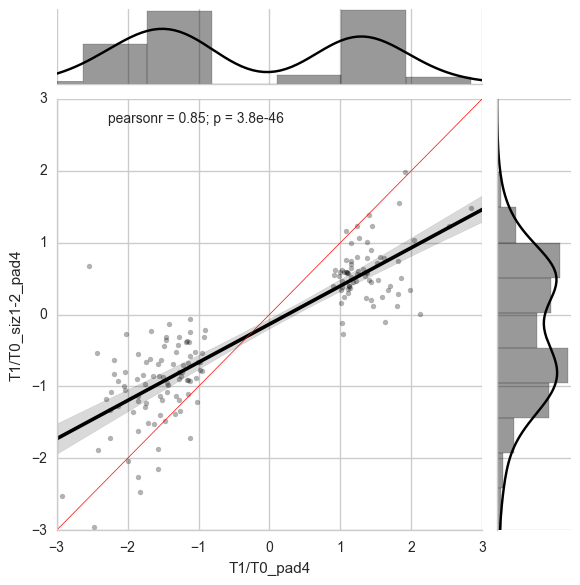

1xB_pad4 saved in: Pad4_NEW/reanalysisTime/relativeToPrevTimepoint/scatterplots/T1T0_pad4-1xB_pad4_DEGsAtT0-T1.scatter.eps


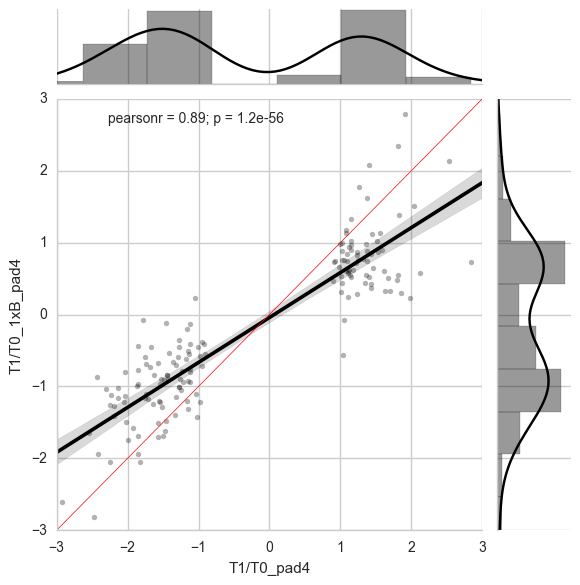

siz1-2_pad4 saved in: Pad4_NEW/reanalysisTime/relativeToPrevTimepoint/scatterplots/T2T1_pad4-siz1-2_pad4_DEGsAtT1-T2.scatter.eps


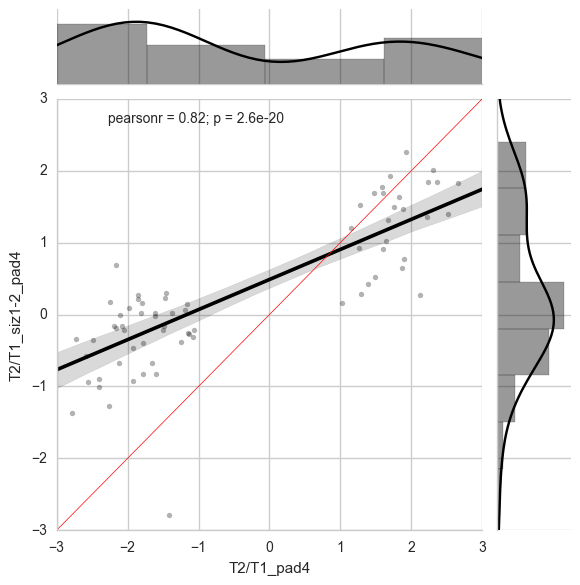

1xB_pad4 saved in: Pad4_NEW/reanalysisTime/relativeToPrevTimepoint/scatterplots/T2T1_pad4-1xB_pad4_DEGsAtT1-T2.scatter.eps


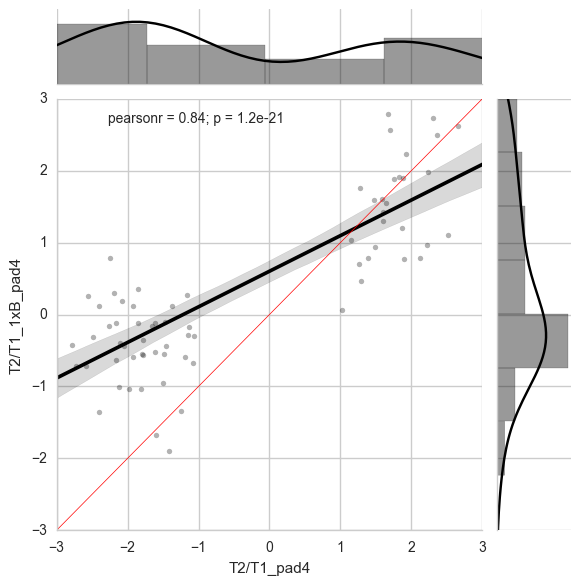

In [3]:
#DEGs per timepoint comparison
timecomp2DEGs = {}
for (tx, ty) in [('T0', 'T1'), ('T1', 'T2')]:
    timecomp = tx+'-'+ty
    DEGs_T = all_rel_data[all_rel_data.probeset_id.isin(\
            pickle.load(open('Pad4_NEW/DEGs_in_Pad4/pickles/'+timecomp+'.probes_as_set')))] 

    sns.set_style("whitegrid")
    for S in strains[1:]:
        
        fig_fname = rdname+'scatterplots/'+ty+tx+'_'+BKGR+'-'+S+'_DEGsAt'+tx+'-'+ty+'.scatter.eps'
        print S, 'saved in:', fig_fname
        plt.figure()
        g = sns.jointplot(DEGs_T[ty+'/'+tx+'_'+BKGR], DEGs_T[ty+'/'+tx+'_'+S],\
                          kind="reg", color="black", scatter_kws = {'s':15, 'alpha':0.3})
        g.ax_joint.set_xlim(-3, 3)
        g.ax_joint.set_ylim(-3, 3)

        (xmin,xmax) = g.ax_joint.get_xlim()
        x = np.arange(xmin,xmax+1)
        g.ax_joint.plot(x, 1*x, color = 'red', linewidth=0.5)
        
        plt.savefig(fig_fname)
        plt.show()
        plt.close()



Now let's look at all genes that are a DEG when we compare the mutant to the background
How do they differ? Are they also less extreme?

We will plot only those genes that are not a time-DEG in the background (i.e. the complement of the plots above). We will plot the absolute difference per timepoint and the difference compared to previous timepoints per timepoint.



siz1-2_pad4 T0 T1/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T1-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtT0.scatter_black.png


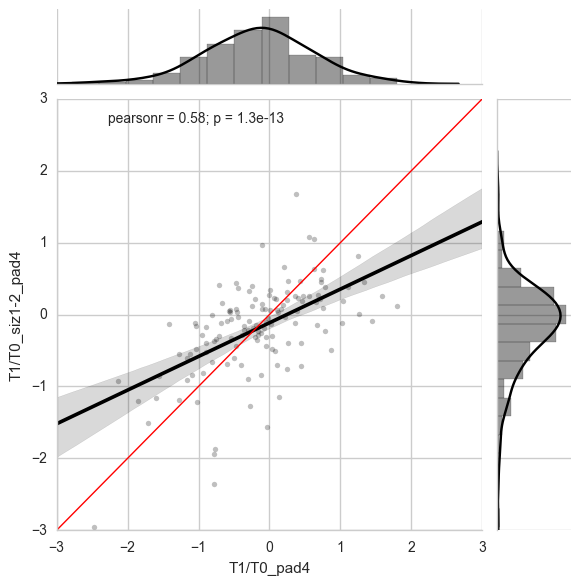

siz1-2_pad4 T0 T2/T1
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T2-T1_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtT0.scatter_black.png


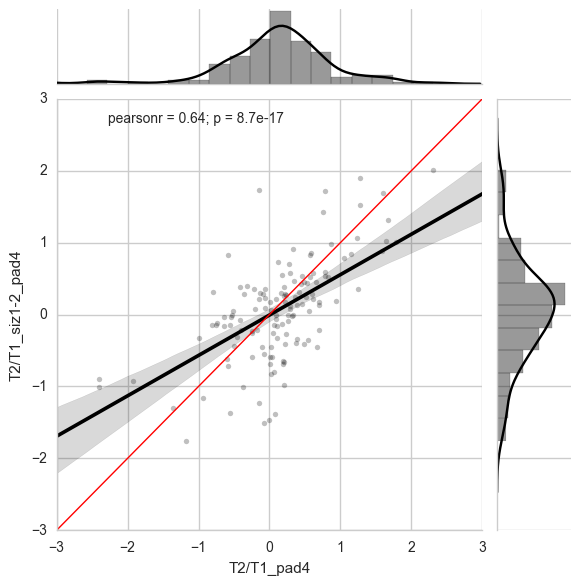

siz1-2_pad4 T0 T2/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T2-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtT0.scatter_black.png


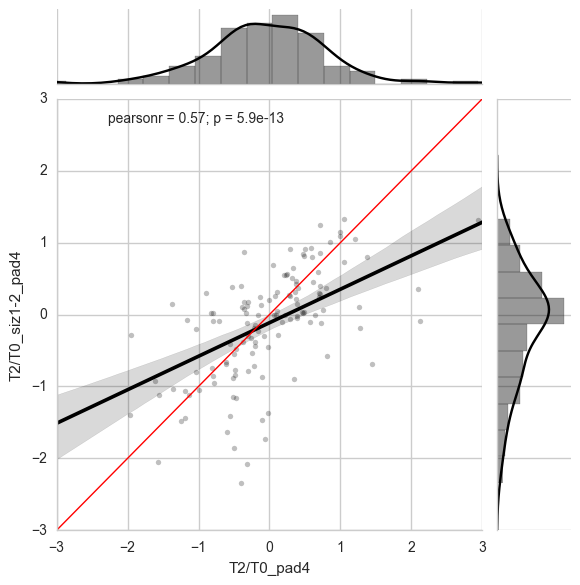

siz1-2_pad4 T1 T1/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T1-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtT1.scatter_black.png


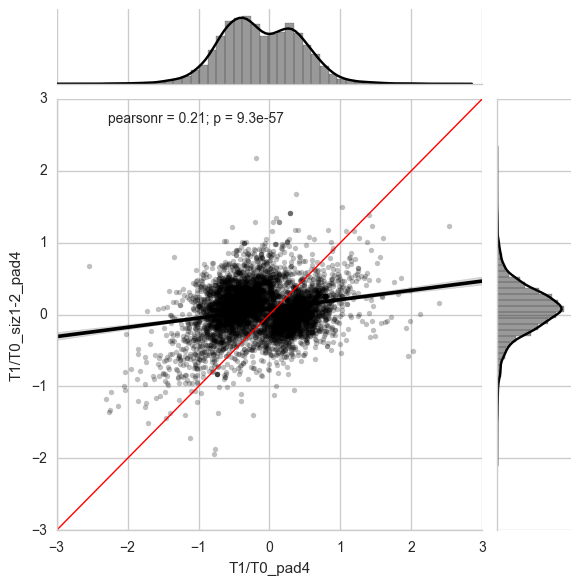

siz1-2_pad4 T1 T2/T1
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T2-T1_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtT1.scatter_black.png


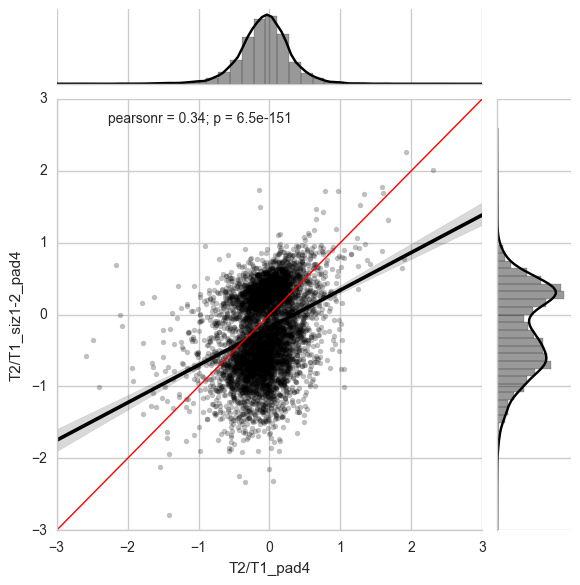

siz1-2_pad4 T1 T2/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T2-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtT1.scatter_black.png


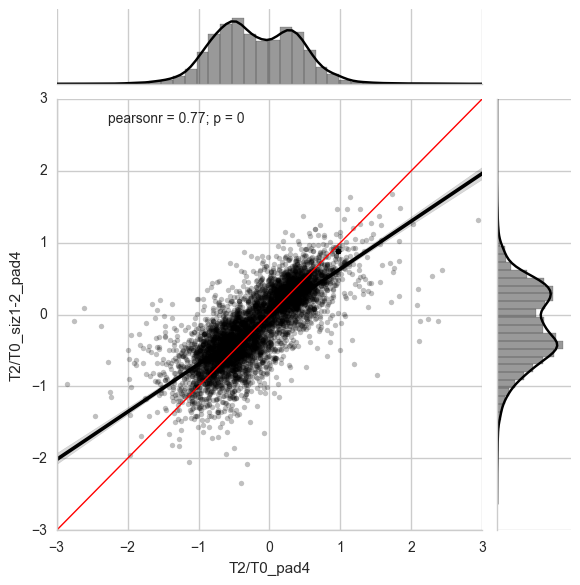

siz1-2_pad4 T2 T1/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T1-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtT2.scatter_black.png


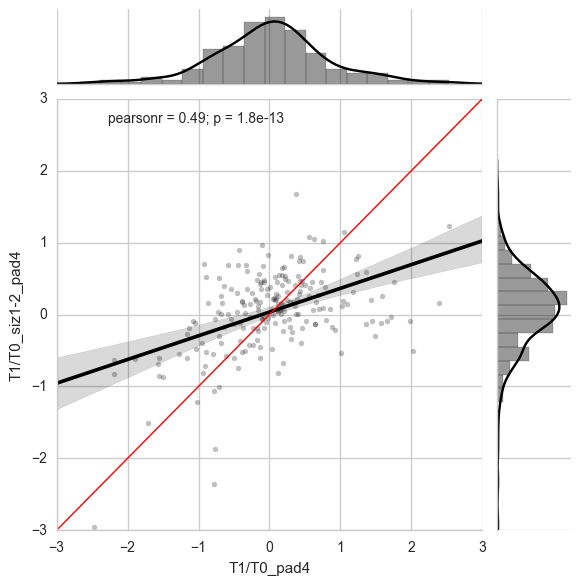

siz1-2_pad4 T2 T2/T1
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T2-T1_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtT2.scatter_black.png


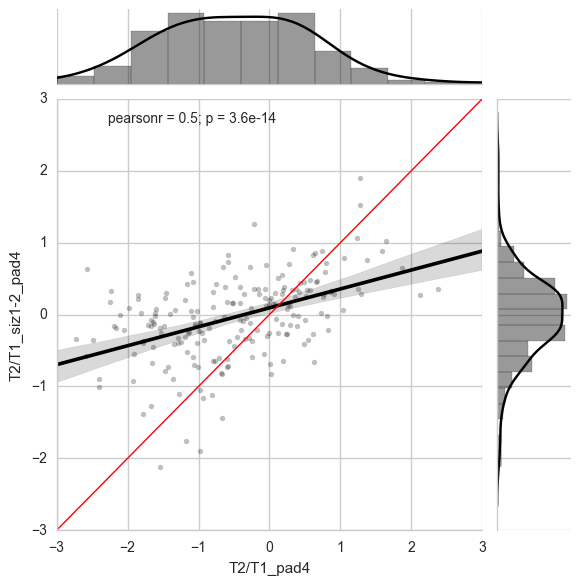

siz1-2_pad4 T2 T2/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T2-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtT2.scatter_black.png


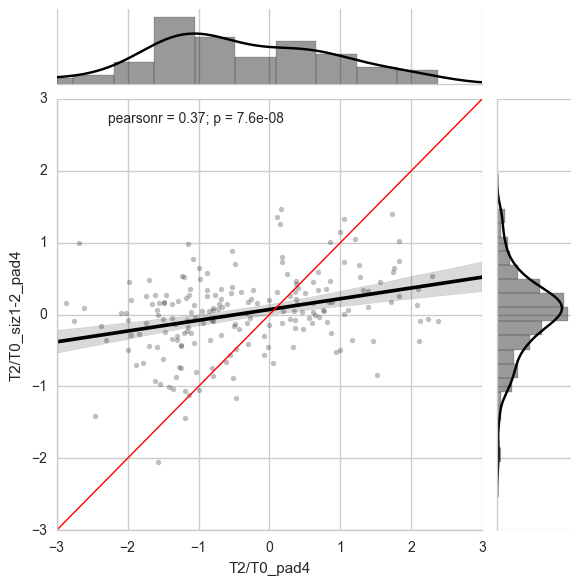

siz1-2_pad4 allT T1/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T1-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT.scatter_black.png


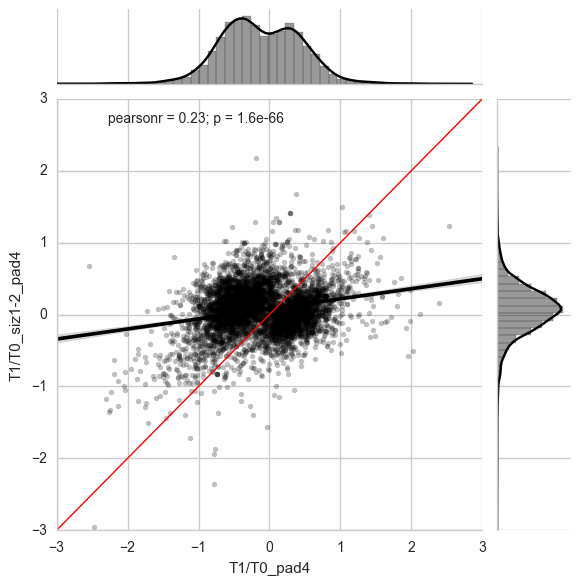

siz1-2_pad4 allT T2/T1
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T2-T1_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT.scatter_black.png


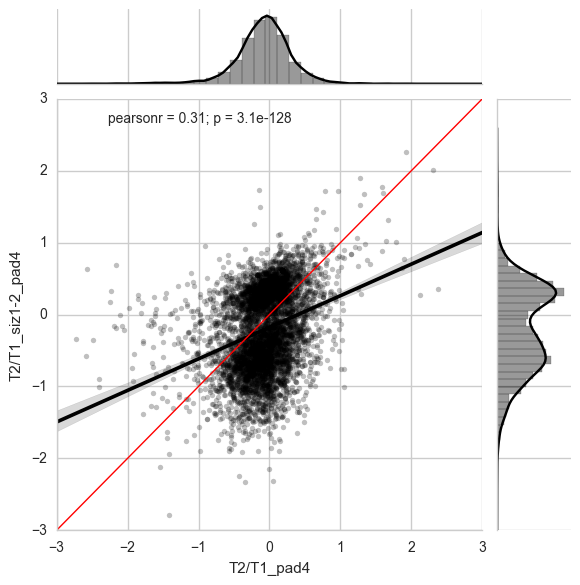

siz1-2_pad4 allT T2/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T2-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT.scatter_black.png


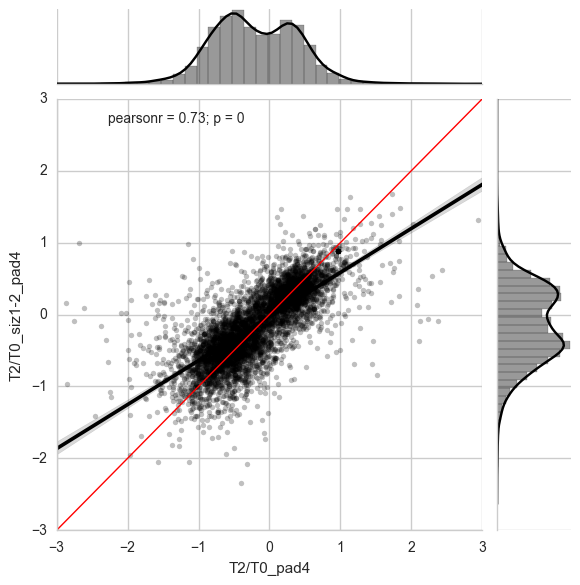

1xB_pad4 T0 T1/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T1-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtT0.scatter_black.png


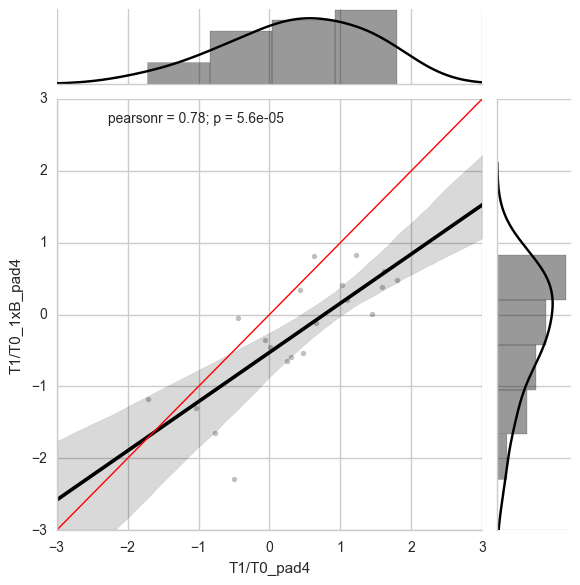

1xB_pad4 T0 T2/T1
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T2-T1_pad4-1xB_pad4_DEGsIn1xB_pad4AtT0.scatter_black.png


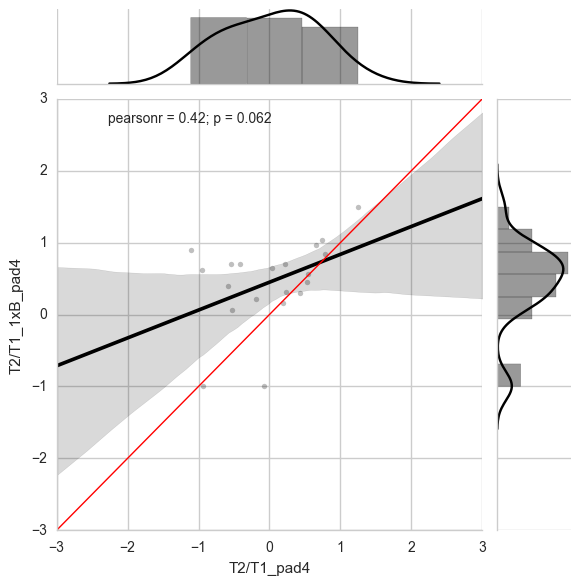

1xB_pad4 T0 T2/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T2-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtT0.scatter_black.png


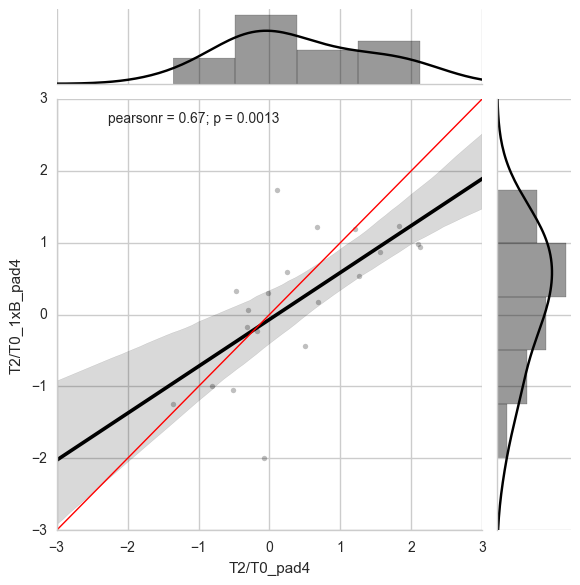

1xB_pad4 T1 T1/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T1-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtT1.scatter_black.png


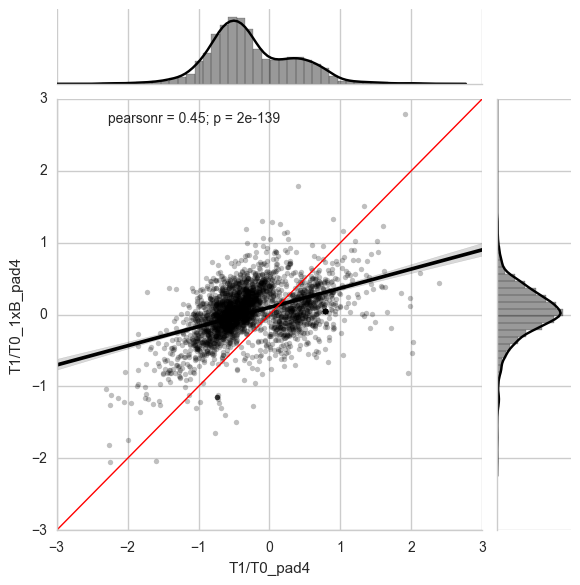

1xB_pad4 T1 T2/T1
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T2-T1_pad4-1xB_pad4_DEGsIn1xB_pad4AtT1.scatter_black.png


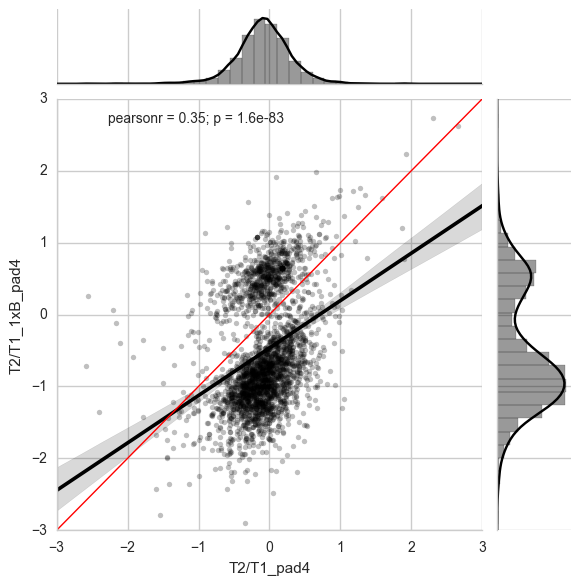

1xB_pad4 T1 T2/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T2-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtT1.scatter_black.png


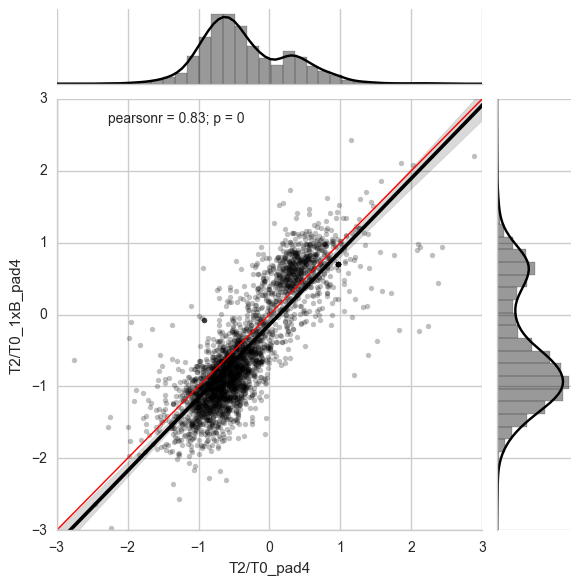

1xB_pad4 T2 T1/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T1-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtT2.scatter_black.png


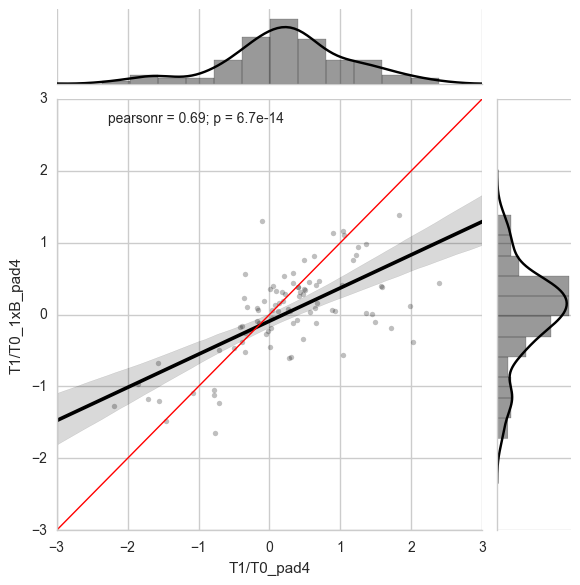

1xB_pad4 T2 T2/T1
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T2-T1_pad4-1xB_pad4_DEGsIn1xB_pad4AtT2.scatter_black.png


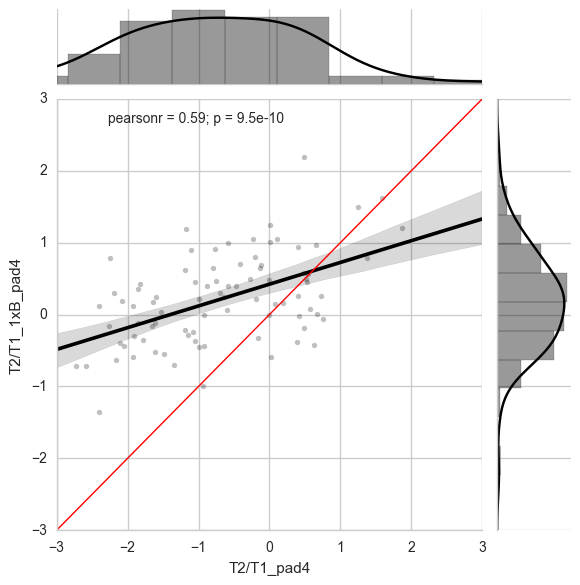

1xB_pad4 T2 T2/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T2-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtT2.scatter_black.png


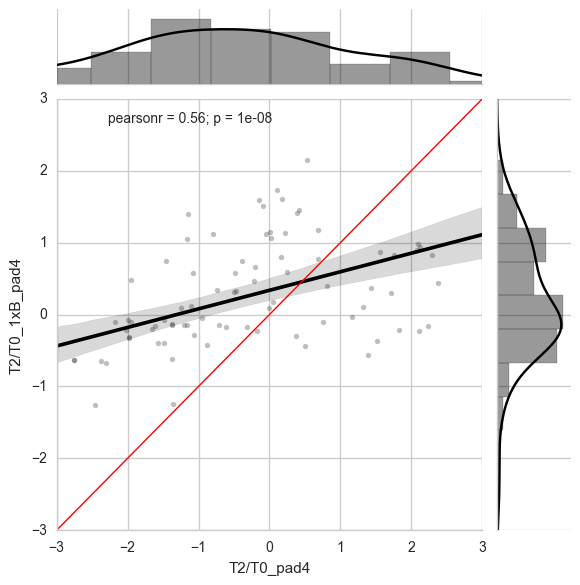

1xB_pad4 allT T1/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T1-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT.scatter_black.png


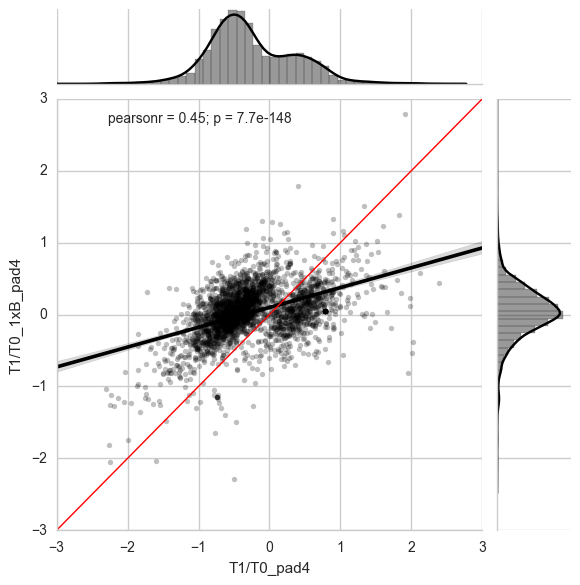

1xB_pad4 allT T2/T1
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T2-T1_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT.scatter_black.png


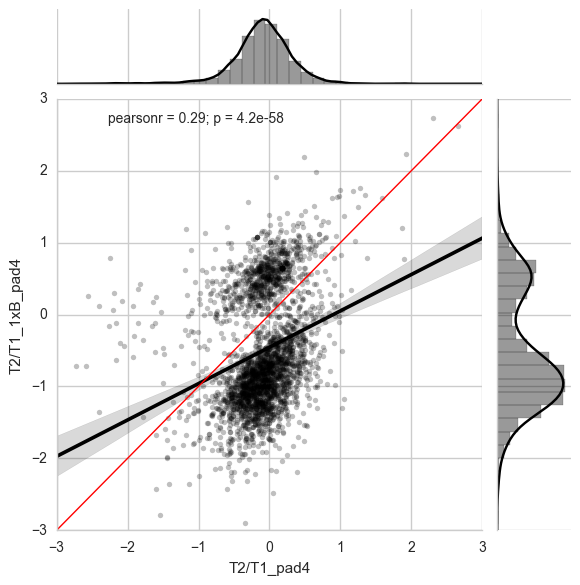

1xB_pad4 allT T2/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T2-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT.scatter_black.png


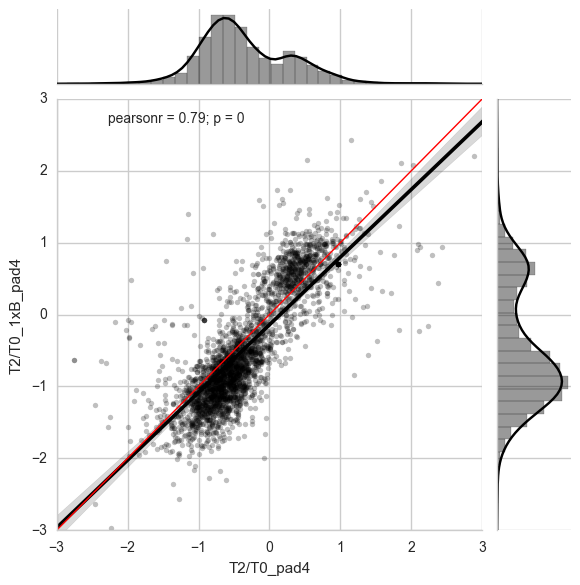

In [4]:
# first, for each mutant, for each timepoint, get all DEGs compared to the background
dirnameStrains = 'Pad4_NEW/reanalysisStrains/'
os.system('mkdir -p '+dirnameStrains+'/scatterplots/')
strain2color = {'siz1-2_pad4':'red', '1xB_pad4':'green'}

def make_scatter_plots(dataframe, BKGR, S, T, outdirname):
        comparisons = ['T1/T0', 'T2/T1', 'T2/T0']
        for comp in comparisons:
            fig_fname = outdirname+S+'/'+\
            comp.replace('/', '-')+'_'+BKGR+'-'+S+'_DEGsIn'+S+'At'+T+'.scatter.png'
            print S, T, comp
            print 'saved in:', fig_fname
            
            plt.figure(figsize=(4,4))
            g = sns.jointplot(dataframe[comp+'_'+BKGR], dataframe[comp+'_'+S],\
                              kind="reg", color=strain2color[S], scatter_kws = {'s':15, 'alpha':0.5})
            g.ax_joint.set_xlim(-3, 3)
            g.ax_joint.set_ylim(-3, 3)

            (xmin,xmax) = g.ax_joint.get_xlim()
            x = np.arange(xmin,xmax+1)
            g.ax_joint.plot(x, 1*x, color = 'black', linewidth=1)

            plt.savefig(fig_fname, dpi = 700)
            plt.show()
            plt.close()
            
def make_scatter_plots_black(dataframe, BKGR, S, T, outdirname):
        comparisons = ['T1/T0', 'T2/T1', 'T2/T0']
        for comp in comparisons:
            fig_fname = outdirname+S+'/'+\
            comp.replace('/', '-')+'_'+BKGR+'-'+S+'_DEGsIn'+S+'At'+T+'.scatter_black.png'
            print S, T, comp
            print 'saved in:', fig_fname
            
            plt.figure(figsize=(4,4))
            g = sns.jointplot(dataframe[comp+'_'+BKGR], dataframe[comp+'_'+S],\
                              kind="reg", color='black', scatter_kws = {'s':15, 'alpha':0.25})
            g.ax_joint.set_xlim(-3, 3)
            g.ax_joint.set_ylim(-3, 3)

            (xmin,xmax) = g.ax_joint.get_xlim()
            x = np.arange(xmin,xmax+1)
            g.ax_joint.plot(x, 1*x, color = 'red', linewidth=1)

            plt.savefig(fig_fname, dpi = 700)
            plt.show()
            plt.close()
            
            
for S in strains[1:]:
    os.system('mkdir -p '+dirnameStrains+'/scatterplots/'+S+'/')
    probes_allT = set([])
    
    for T in timepoints:
        probesT = pickle.load(open(dirnameStrains+'pickles/'+T+'_'+BKGR+'_vs_'+S+'.probes_as_set'))
        probes_allT = probes_allT.union(probesT)
        DEGs_T  = df[df.probeset_id.isin(probesT)] 
        
        # put all data in a single dataFrame
        rel_data = pd.DataFrame({'probeset_id': DEGs_T['probeset_id'],\
                                 'T1/T0_'+BKGR: DEGs_T['T1_'+BKGR]-DEGs_T['T0_'+BKGR],\
                                 'T2/T0_'+BKGR: DEGs_T['T2_'+BKGR]-DEGs_T['T0_'+BKGR],\
                                 'T2/T1_'+BKGR: DEGs_T['T2_'+BKGR]-DEGs_T['T1_'+BKGR],\
                                 'T1/T0_'+S: DEGs_T['T1_'+S]-DEGs_T['T0_'+S],\
                                 'T2/T0_'+S: DEGs_T['T2_'+S]-DEGs_T['T0_'+S],\
                                 'T2/T1_'+S: DEGs_T['T2_'+S]-DEGs_T['T1_'+S]})

        outdirname = dirnameStrains+'scatterplots/'
        make_scatter_plots_black(rel_data, BKGR, S, T, outdirname)
        
    DEGs_allT  = df[df.probeset_id.isin(probes_allT)] 
        
    # put all data in a single dataFrame
    rel_data = pd.DataFrame({'probeset_id': DEGs_allT['probeset_id'],\
                             'T1/T0_'+BKGR: DEGs_allT['T1_'+BKGR]-DEGs_allT['T0_'+BKGR],\
                             'T2/T0_'+BKGR: DEGs_allT['T2_'+BKGR]-DEGs_allT['T0_'+BKGR],\
                             'T2/T1_'+BKGR: DEGs_allT['T2_'+BKGR]-DEGs_allT['T1_'+BKGR],\
                             'T1/T0_'+S: DEGs_allT['T1_'+S]-DEGs_allT['T0_'+S],\
                             'T2/T0_'+S: DEGs_allT['T2_'+S]-DEGs_allT['T0_'+S],\
                             'T2/T1_'+S: DEGs_allT['T2_'+S]-DEGs_allT['T1_'+S]})

    outdirname = dirnameStrains+'scatterplots/'
    #make_scatter_plots(rel_data, BKGR, S, 'allT', outdirname)
    make_scatter_plots_black(rel_data, BKGR, S, 'allT', outdirname)
        

So we see a delay in the response to temperature change in both mutants, where Siz1.2 remains a bit 'behind', just as we observed for the DEGs-in-time (1.heatmap_bkgrDEGs_inMutant)
Our next question is whether genes that 'remain behind' are enriched for putative targets for growth-TFs.

For this we need to convert probeset_id to transcripts to be able to overlay them with PIF4, BZR1, ARF6 and Hy5 target data.


In [5]:
import glob
def homogenize_geneID(string):
    return string.strip().upper().split('.')[0]


# make dict with transcript_id --> probeset_id mapping
def update_transcript2probe(fname, t2p, all_probes):
    lines = open(fname).readlines()[1:]
    for line in lines:
        #print line
        data        = line.strip().split('\t')
        probe       = int(data[0])
        transcripts = [homogenize_geneID(x) for x in data[1].split(';')]
        
        for t in transcripts:
            t2p[t] = probe
            all_probes.add(probe)
            
    return t2p, all_probes

dirnameStrains = 'Pad4_NEW/reanalysisStrains/'
transcript2probe = {}
all_probes = set([])
for fname in glob.glob(dirnameStrains+'*_vs_*.txt'):
    transcript2probe, all_probes = update_transcript2probe(fname, transcript2probe, all_probes)
    print len(transcript2probe.keys())


28343
28343
28343
28343
28343
28343
28343
28343
28343


Reference set of probes on microarray: 28403
Reference set of probes in ChIP and RNA seq experiments (TAIR9): 26859
Reference set of probes in ChIP and RNA seq experiments (TAIR9) AND microarray: 26859




**************
*
*	siz1-2_pad4
*
**************

* ARF6
71 unknown transcripts, 2546 probes
TESTING FOR ENRICHMENT
ARF6 630 out of 2546 are a DEG: 9.23870819838e-11
Contigency:
        	target	 no target	 total
DEG     	630	4702	5332
no DEG  	1916	19611	21527
Total   	2546	24313	26859



* HY5
107 unknown transcripts, 3771 probes
TESTING FOR ENRICHMENT
HY5 969 out of 3771 are a DEG: 1.43984978296e-21
Contigency:
        	target	 no target	 total
DEG     	969	4363	5332
no DEG  	2802	18725	21527
Total   	3771	23088	26859



* BZR1
71 unknown transcripts, 4170 probes
TESTING FOR ENRICHMENT
BZR1 959 out of 4170 are a DEG: 2.11310365671e-08
Contigency:
        	target	 no target	 total
DEG     	959	4373	5332
no DEG  	3211	18316	21527
Total   	4170	22689	26859



* regulated_by_BZR1
152 un

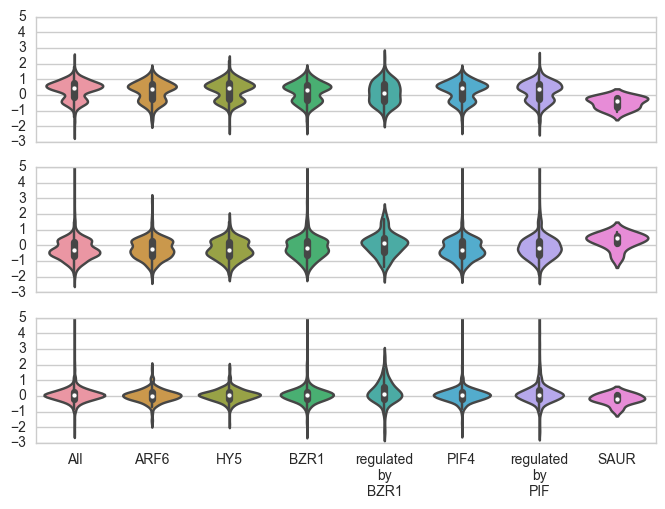

**************
*
*	1xB_pad4
*
**************

* ARF6
71 unknown transcripts, 2546 probes
TESTING FOR ENRICHMENT
ARF6 313 out of 2546 are a DEG: 0.000146379678614
Contigency:
        	target	 no target	 total
DEG     	313	2426	2739
no DEG  	2233	21887	24120
Total   	2546	24313	26859



* HY5
107 unknown transcripts, 3771 probes
TESTING FOR ENRICHMENT
HY5 476 out of 3771 are a DEG: 9.99713508144e-08
Contigency:
        	target	 no target	 total
DEG     	476	2263	2739
no DEG  	3295	20825	24120
Total   	3771	23088	26859



* BZR1
71 unknown transcripts, 4170 probes
TESTING FOR ENRICHMENT
BZR1 483 out of 4170 are a DEG: 0.000691861349122
Contigency:
        	target	 no target	 total
DEG     	483	2256	2739
no DEG  	3687	20433	24120
Total   	4170	22689	26859



* regulated_by_BZR1
152 unknown transcripts, 1983 probes
TESTING FOR ENRICHMENT
regulated_by_BZR1 167 out of 1983 are a DEG: 0.996889102047
Contigency:
        	target	 no target	 total
DEG     	167	2572	2739
no DEG  	1816	22304	24120


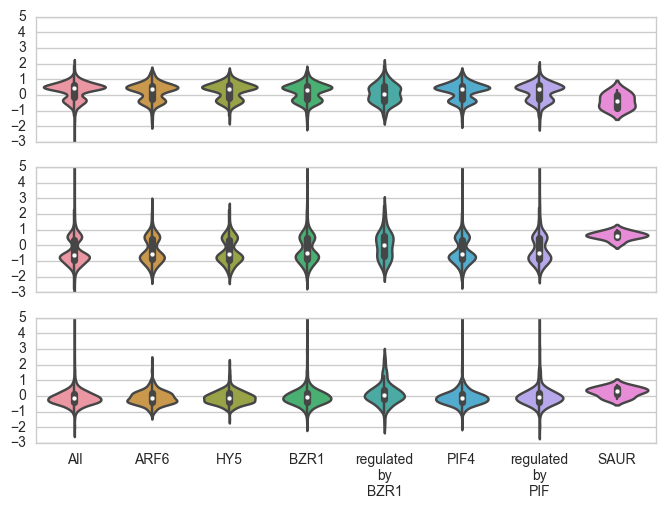

In [9]:
import glob
import numpy as np

# lists with TF targets
gene_lists = ['ARF6', 'HY5', 'BZR1', 'regulated_by_BZR1', 'PIF4', 'regulated_by_PIF', 'SAUR']
color_list = ['#228B22', '#9400D3', '#1E90FF', '#00008B', '#B22222', '#800000', '#FFD700']

#calculate significance of overlap
print 'Reference set of probes on microarray:', len(all_probes)
refset_ChIPRNAexp = set([])
Nunknown = 0
for transcript_id in [homogenize_geneID(x) for x in open('TAIR9_representative_gene_model.txt').readlines()[5:]]:
    if transcript2probe.has_key(transcript_id):
        refset_ChIPRNAexp.add(transcript2probe[transcript_id])
    else:
        Nunknown += 1
print 'Reference set of probes in ChIP and RNA seq experiments (TAIR9):', len(refset_ChIPRNAexp)

REFSET_PROBES = all_probes.intersection(refset_ChIPRNAexp)
print 'Reference set of probes in ChIP and RNA seq experiments (TAIR9) AND microarray:', len(REFSET_PROBES)
print '\n\n\n'

outdirname = dirnameStrains+'violin_box_plots/'
os.system('mkdir -p '+outdirname)
for S in strains[1:]:
    print '**************'
    print '*'
    print '*\t',S
    print '*'
    print '**************\n'
    # get all probes that are a DEG at some timepoint:
    probes_allT = set([])
    for T in timepoints:
        probesT = pickle.load(open(dirnameStrains+'pickles/'+T+'_'+BKGR+'_vs_'+S+'.probes_as_set'))
        probes_allT = probes_allT.union(probesT)
        
    # put all data in a single dataFrame
    rel_diff = pd.DataFrame({'probeset_id': DEGs_allT['probeset_id'],\
                             'T1/T0_'+BKGR+'_vs_'+S: (DEGs_allT['T1_'+S]-DEGs_allT['T0_'+S])\
                             - (DEGs_allT['T1_'+BKGR]-DEGs_allT['T0_'+BKGR]),\
                             'T2/T0_'+BKGR+'_vs_'+S: (DEGs_allT['T2_'+S]-DEGs_allT['T0_'+S])\
                             - (DEGs_allT['T2_'+BKGR]-DEGs_allT['T0_'+BKGR]),\
                             'T2/T1_'+BKGR+'_vs_'+S: (DEGs_allT['T2_'+S]-DEGs_allT['T1_'+S])
                                - (DEGs_allT['T2_'+BKGR]-DEGs_allT['T1_'+BKGR])})
    
    comparison2values = {}
    comparison2values['T1/T0_'+BKGR+'_vs_'+S] = [list(rel_diff['T1/T0_'+BKGR+'_vs_'+S])]
    comparison2values['T2/T1_'+BKGR+'_vs_'+S] = [list(rel_diff['T2/T1_'+BKGR+'_vs_'+S])]
    comparison2values['T2/T0_'+BKGR+'_vs_'+S] = [list(rel_diff['T2/T0_'+BKGR+'_vs_'+S])]
    
    #print comparison2values
    for subset_name in gene_lists:
        
        print '*', subset_name
       
        #copy-pasted from excel files, hence the 'U'
        subset = set([homogenize_geneID(x) for x in open('gene_lists/'+subset_name+'.txt', 'U')])
        
        #convert these geneIDs to probeids
        subset_probes = set([])
        Nunknown = 0
        for transcript_id in subset:
            if transcript2probe.has_key(transcript_id):
                subset_probes.add(transcript2probe[transcript_id])
            else:
                #print 'no probe for transcript:', transcript_id
                Nunknown += 1
                
        print Nunknown, 'unknown transcripts,',len(subset_probes), 'probes' 
        
        # The hypergeometric distribution models drawing objects from a bin. 
        # M is the total number of objects, n is total number of Type I objects. 
        # The random variate represents the number of Type I objects in N drawn without replacement from the total population.
        M = len(REFSET_PROBES) # all genes
        n = len(probes_allT.intersection(REFSET_PROBES)) # all DEGs
        N = len(subset_probes) # TF target
        x = len(subset_probes.intersection(probes_allT)) # TF target and DEG
        print 'TESTING FOR ENRICHMENT'
        print subset_name, x, 'out of', N, 'are a DEG:', stats.hypergeom.sf(x, M, n, N)
        print 'Contigency:'
        
        print '        \ttarget\t no target\t total'
        print 'DEG     \t'+str(x)+'\t'+str(n-x)+'\t'+str(n)
        print 'no DEG  \t'+str(N-x)+'\t'+str((M-n)-(N-x))+'\t'+str(M-n)
        print 'Total   \t'+str(N)+'\t'+str(M-N)+'\t'+str(M)
        print '\n\n'
    
        # add those values for which the probeset_id is in subset_probes: 
        # add the difference in relative expression level for genes that are a target of a TF 
        # (or fall in some functional class)
        subset_data = rel_diff[rel_diff['probeset_id'].isin(subset_probes)]
        
        comparison2values['T1/T0_'+BKGR+'_vs_'+S].append(list(subset_data['T1/T0_'+BKGR+'_vs_'+S]))
        comparison2values['T2/T1_'+BKGR+'_vs_'+S].append(list(subset_data['T2/T1_'+BKGR+'_vs_'+S]))
        comparison2values['T2/T0_'+BKGR+'_vs_'+S].append(list(subset_data['T2/T0_'+BKGR+'_vs_'+S]))
          
        
    
    # plot in violinplot
    #comparisons = ['T1/T0_'+BKGR+'_vs_'+S, 'T2/T1_'+BKGR+'_vs_'+S, 'T2/T0_'+BKGR+'_vs_'+S]
    xlabels = ['All']
    for list_name in gene_lists:
        xlabels.append(list_name.replace('_', '\n'))

    f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
    #ax1.set_facecolor('w')
    #ax2.set_facecolor('w')
    #ax3.set_facecolor('w')
    
    sns.violinplot(data = comparison2values['T1/T0_'+BKGR+'_vs_'+S], colors = color_list, ax = ax1)
    sns.violinplot(data = comparison2values['T2/T1_'+BKGR+'_vs_'+S], colors = color_list, ax = ax2)
    sns.violinplot(data = comparison2values['T2/T0_'+BKGR+'_vs_'+S], colors = color_list, ax = ax3)
    
    ax3.set_xticks(range(len(gene_lists)+1))
    ax3.set_xticklabels(xlabels)
    
    ax1.set_ylim(-3,5)
    ax2.set_ylim(-3,5)
    ax3.set_ylim(-3,5)
    
    plt.savefig(outdirname+'violin_'+S+'.eps')
    plt.show()
    plt.close()
      
    


Plot these catgories in scatterplots

siz1-2_pad4 allT T1/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T1-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightARF6.scatter2.png


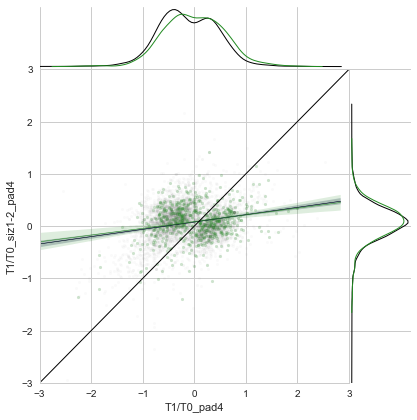

siz1-2_pad4 allT T2/T1
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T2-T1_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightARF6.scatter2.png


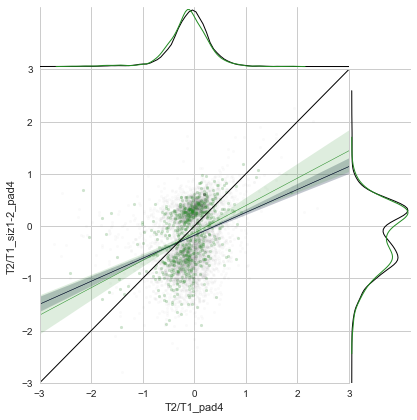

siz1-2_pad4 allT T2/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T2-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightARF6.scatter2.png


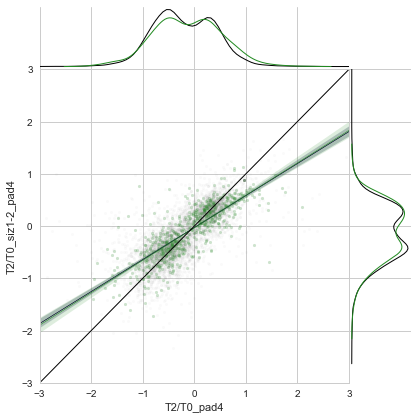

siz1-2_pad4 allT T1/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T1-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightHY5.scatter2.png


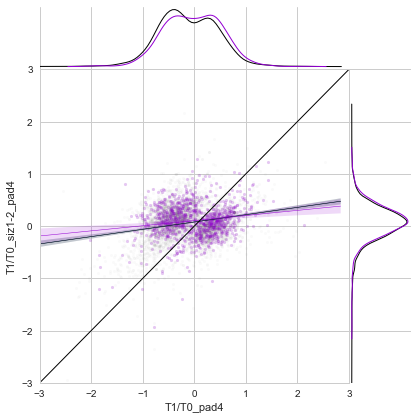

siz1-2_pad4 allT T2/T1
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T2-T1_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightHY5.scatter2.png


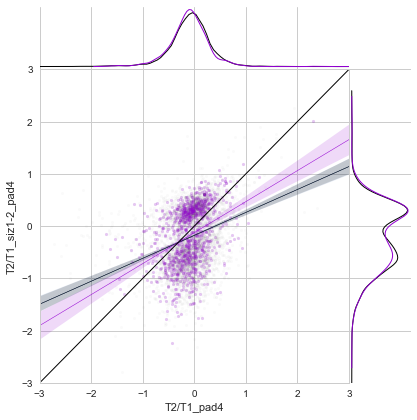

siz1-2_pad4 allT T2/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T2-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightHY5.scatter2.png


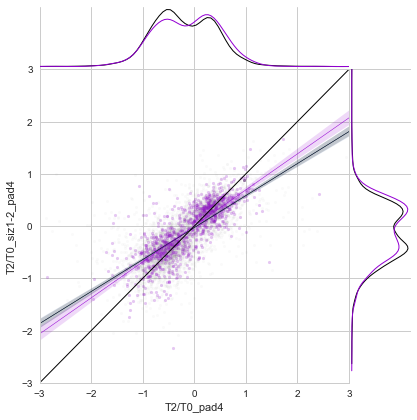

siz1-2_pad4 allT T1/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T1-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightBZR1.scatter2.png


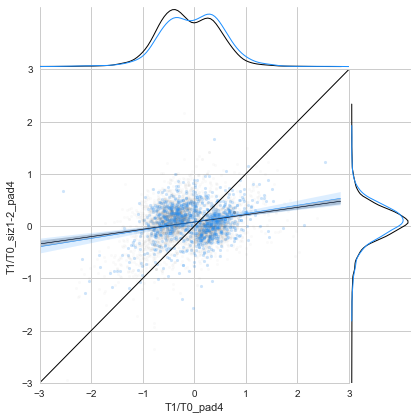

siz1-2_pad4 allT T2/T1
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T2-T1_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightBZR1.scatter2.png


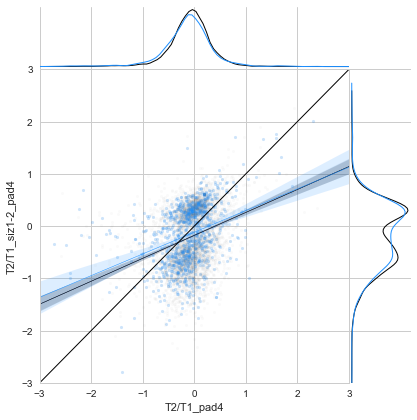

siz1-2_pad4 allT T2/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T2-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightBZR1.scatter2.png


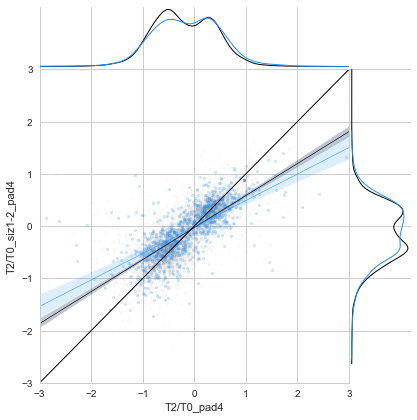

siz1-2_pad4 allT T1/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T1-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightregulated_by_BZR1.scatter2.png


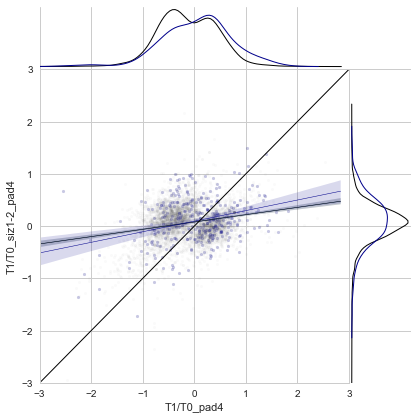

siz1-2_pad4 allT T2/T1
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T2-T1_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightregulated_by_BZR1.scatter2.png


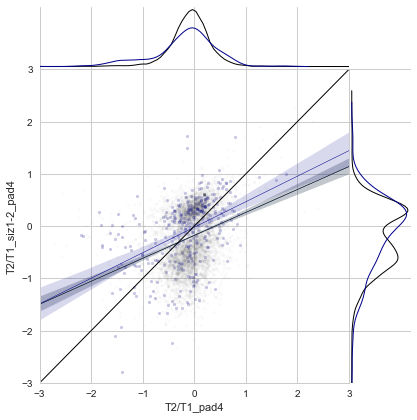

siz1-2_pad4 allT T2/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T2-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightregulated_by_BZR1.scatter2.png


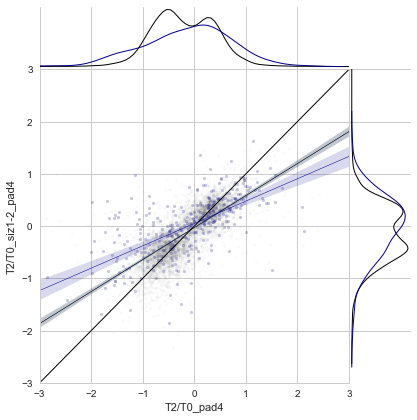

siz1-2_pad4 allT T1/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T1-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightPIF4.scatter2.png


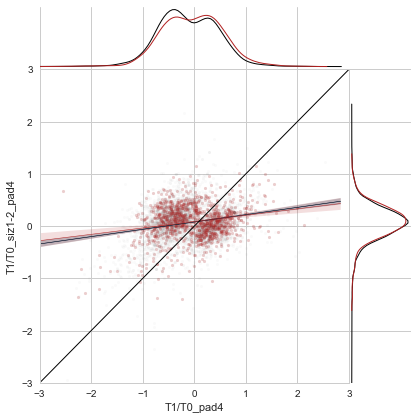

siz1-2_pad4 allT T2/T1
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T2-T1_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightPIF4.scatter2.png


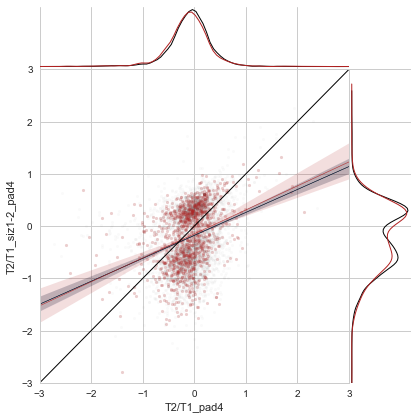

siz1-2_pad4 allT T2/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T2-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightPIF4.scatter2.png


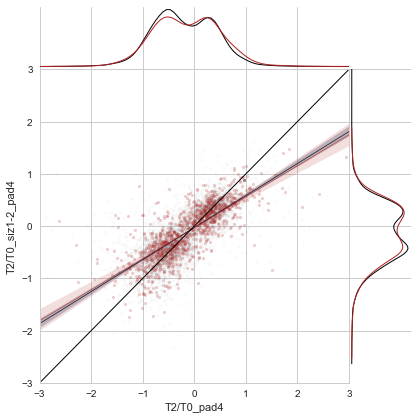

siz1-2_pad4 allT T1/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T1-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightregulated_by_PIF.scatter2.png


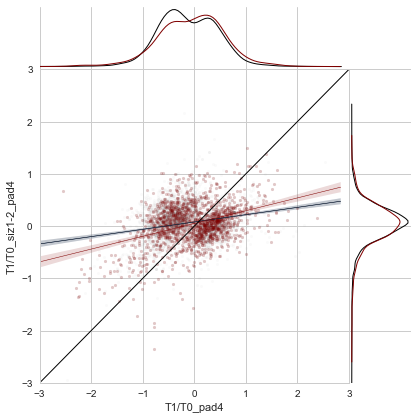

siz1-2_pad4 allT T2/T1
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T2-T1_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightregulated_by_PIF.scatter2.png


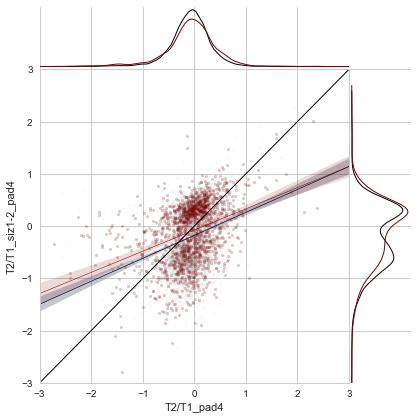

siz1-2_pad4 allT T2/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T2-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightregulated_by_PIF.scatter2.png


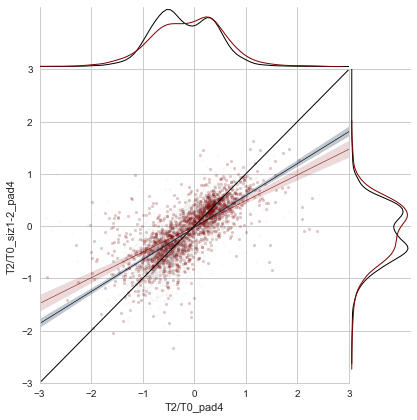

siz1-2_pad4 allT T1/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T1-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightSAUR.scatter2.png


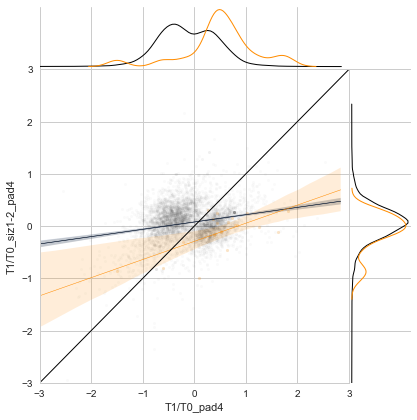

siz1-2_pad4 allT T2/T1
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T2-T1_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightSAUR.scatter2.png


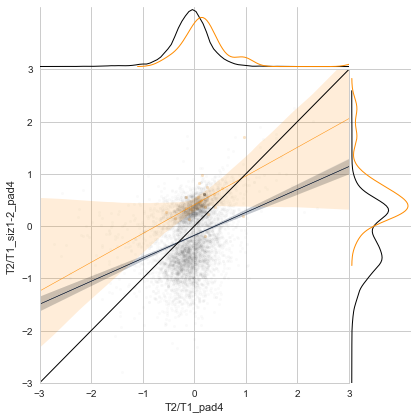

siz1-2_pad4 allT T2/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/siz1-2_pad4/T2-T0_pad4-siz1-2_pad4_DEGsInsiz1-2_pad4AtallT__highlightSAUR.scatter2.png


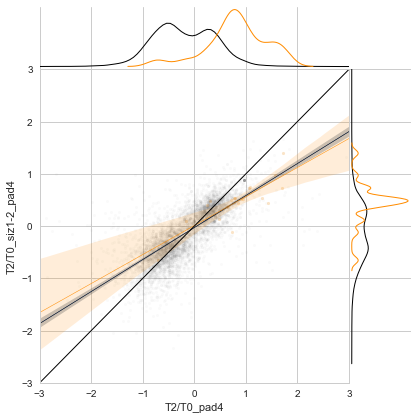

1xB_pad4 allT T1/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T1-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightARF6.scatter2.png


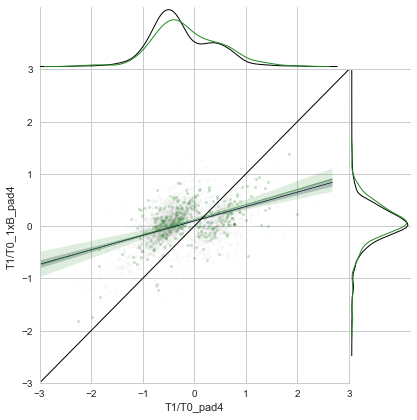

1xB_pad4 allT T2/T1
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T2-T1_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightARF6.scatter2.png


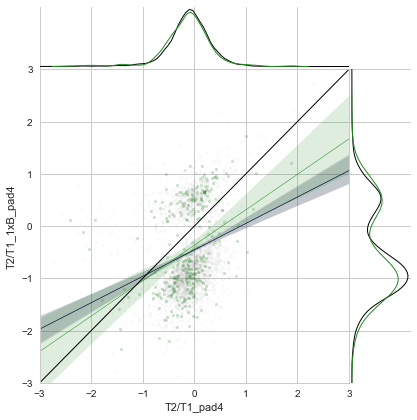

1xB_pad4 allT T2/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T2-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightARF6.scatter2.png


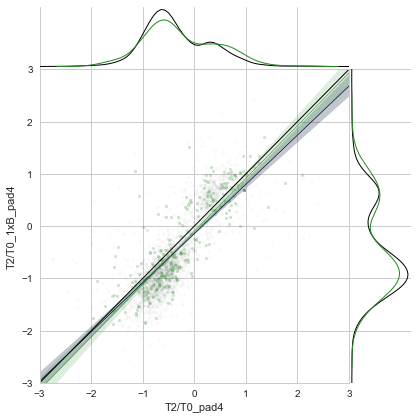

1xB_pad4 allT T1/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T1-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightHY5.scatter2.png


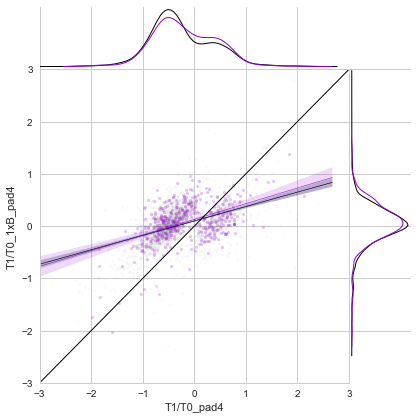

1xB_pad4 allT T2/T1
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T2-T1_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightHY5.scatter2.png


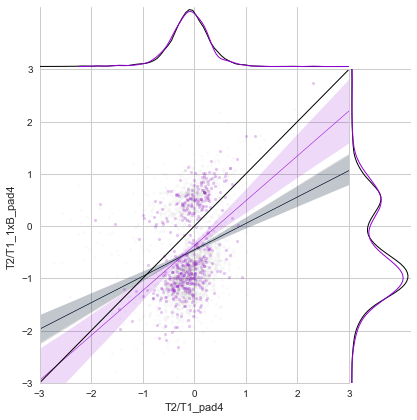

1xB_pad4 allT T2/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T2-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightHY5.scatter2.png


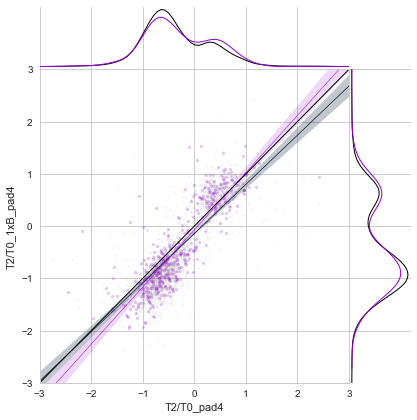

1xB_pad4 allT T1/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T1-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightBZR1.scatter2.png


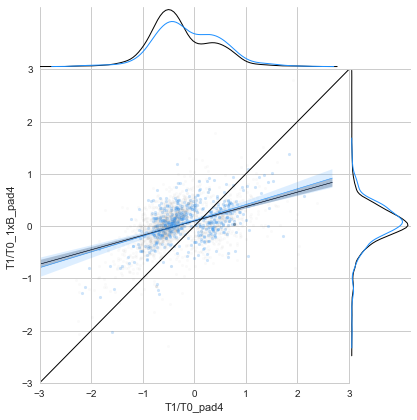

1xB_pad4 allT T2/T1
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T2-T1_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightBZR1.scatter2.png


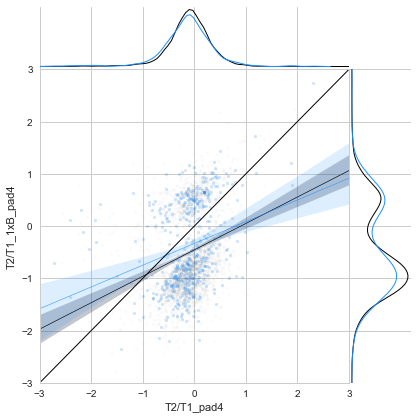

1xB_pad4 allT T2/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T2-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightBZR1.scatter2.png


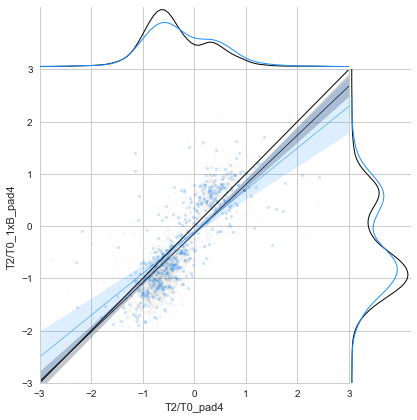

1xB_pad4 allT T1/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T1-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightregulated_by_BZR1.scatter2.png


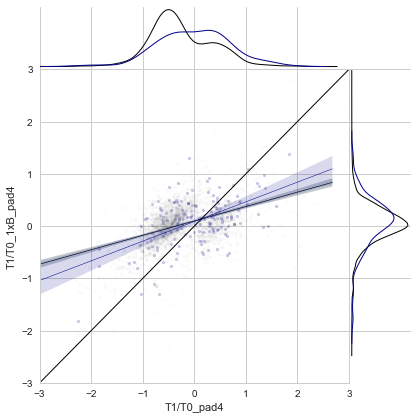

1xB_pad4 allT T2/T1
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T2-T1_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightregulated_by_BZR1.scatter2.png


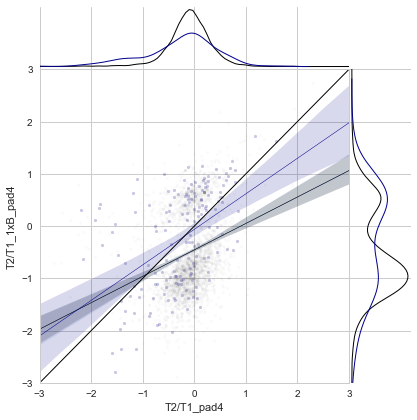

1xB_pad4 allT T2/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T2-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightregulated_by_BZR1.scatter2.png


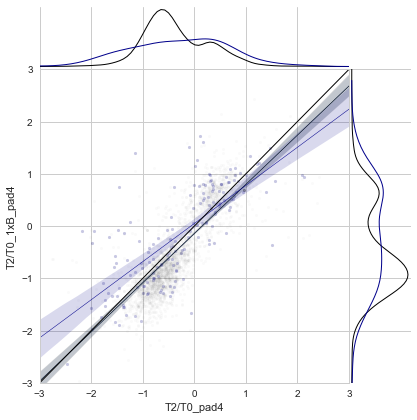

1xB_pad4 allT T1/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T1-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightPIF4.scatter2.png


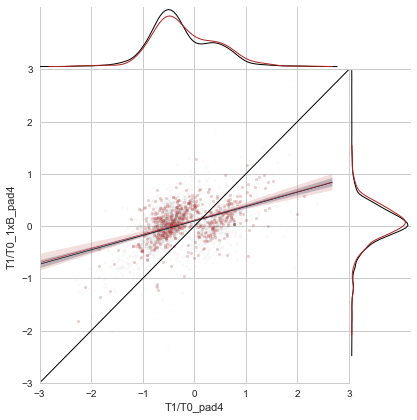

1xB_pad4 allT T2/T1
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T2-T1_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightPIF4.scatter2.png


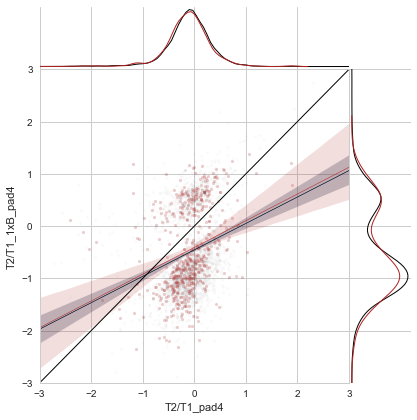

1xB_pad4 allT T2/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T2-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightPIF4.scatter2.png


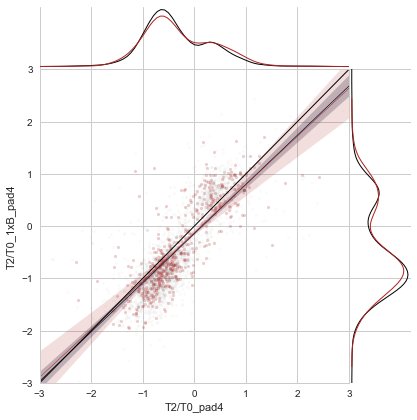

1xB_pad4 allT T1/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T1-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightregulated_by_PIF.scatter2.png


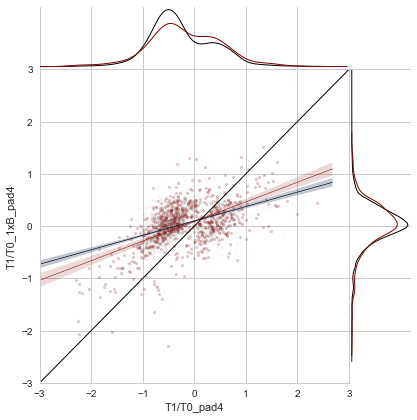

1xB_pad4 allT T2/T1
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T2-T1_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightregulated_by_PIF.scatter2.png


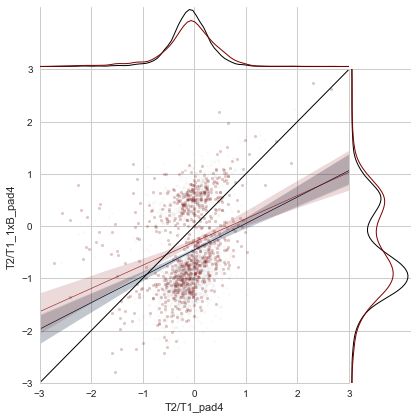

1xB_pad4 allT T2/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T2-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightregulated_by_PIF.scatter2.png


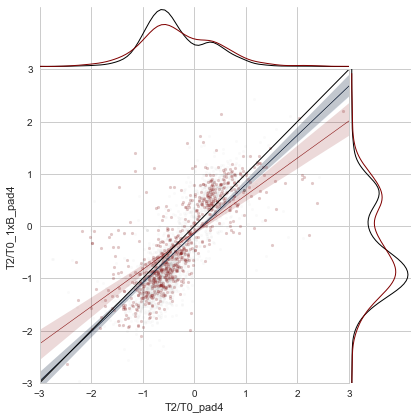

1xB_pad4 allT T1/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T1-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightSAUR.scatter2.png


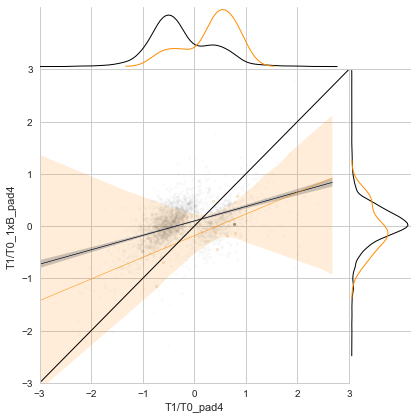

1xB_pad4 allT T2/T1
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T2-T1_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightSAUR.scatter2.png


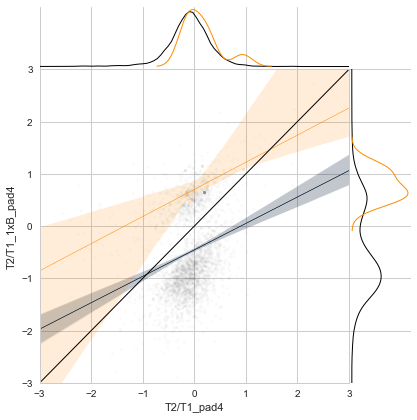

1xB_pad4 allT T2/T0
saved in: Pad4_NEW/reanalysisStrains/scatterplots/1xB_pad4/T2-T0_pad4-1xB_pad4_DEGsIn1xB_pad4AtallT__highlightSAUR.scatter2.png


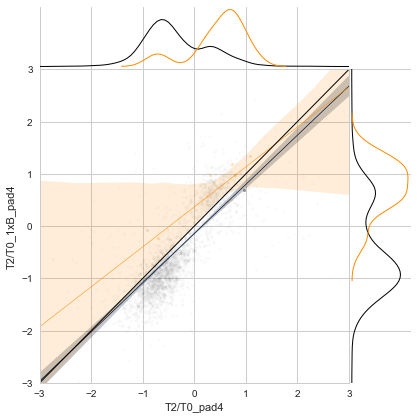

In [103]:

    
    
def make_scatter_plots_highlight(dataframe, BKGR, S, T, outdirname,\
                                 selected_probes, name_selection, color, bkgr_color = 'black', ps = 10, ):
        comparisons = ['T1/T0', 'T2/T1', 'T2/T0']
        for comp in comparisons:
            fig_fname = outdirname+S+'/'+\
            comp.replace('/', '-')+'_'+BKGR+'-'+S+'_DEGsIn'+S+'At'+T+'__highlight'+name_selection+'.scatter2.png'
            print S, T, comp
            print 'saved in:', fig_fname
            
            plt.figure(figsize=(4,4))
            # plot all
            g = sns.JointGrid(dataframe[comp+'_'+BKGR], dataframe[comp+'_'+S], space=0)
            g = g.plot_joint(sns.regplot, scatter_kws = {'s':ps, 'alpha':0.02, 'color': bkgr_color}\
                             , line_kws = {'linewidth' : 0.5})
            g.plot_marginals(sns.kdeplot, color=bkgr_color,linewidth=1, legend=False)
            sns.regplot(dataframe[comp+'_'+BKGR], dataframe[comp+'_'+S], ax=g.ax_joint,\
                        color=bkgr_color, scatter = False, line_kws = {'linewidth' : 0.5})
    
            #plot subset (selection) in different color
            subset_data = dataframe[dataframe['probeset_id'].isin(selected_probes)]
            sns.regplot(subset_data[comp+'_'+BKGR], subset_data[comp+'_'+S], ax=g.ax_joint,\
                        color=color, scatter_kws = {'s':ps, 'alpha':0.2, 'marker':'o'}, line_kws = {'linewidth' : 0.5})
            sns.kdeplot(subset_data[comp+'_'+BKGR], color=color, ax = g.ax_marg_x,linewidth=1,legend=False)
            sns.kdeplot(subset_data[comp+'_'+S], color=color, ax = g.ax_marg_y,vertical=True\
                        ,linewidth=1, legend=False)
            
            g.ax_joint.set_xlim(-3, 3)
            g.ax_joint.set_ylim(-3, 3)

            (xmin,xmax) = g.ax_joint.get_xlim()
            x = np.arange(xmin,xmax+1)
            g.ax_joint.plot(x, 1*x, color = 'black', linewidth=1)

            plt.savefig(fig_fname, dpi = 700)
            plt.show()
            plt.close()
 


# lists with TF targets
gene_lists = ['ARF6', 'HY5', 'BZR1', 'regulated_by_BZR1', 'PIF4', 'regulated_by_PIF', 'SAUR']
color_list = ['#228B22', '#9400D3', '#1E90FF', '#00008B', '#B22222', '#800000', '#FF8C00']
outdirname = dirnameStrains+'scatterplots/'

for S in strains[1:]:
    os.system('mkdir -p '+dirnameStrains+'/scatterplots/'+S+'/')
    probes_allT = set([])
    
    for T in timepoints:
        probesT = pickle.load(open(dirnameStrains+'pickles/'+T+'_'+BKGR+'_vs_'+S+'.probes_as_set'))
        probes_allT = probes_allT.union(probesT)
        
    DEGs_allT  = df[df.probeset_id.isin(probes_allT)] 
        
    # put all data in a single dataFrame
    rel_data = pd.DataFrame({'probeset_id': DEGs_allT['probeset_id'],\
                             'T1/T0_'+BKGR: DEGs_allT['T1_'+BKGR]-DEGs_allT['T0_'+BKGR],\
                             'T2/T0_'+BKGR: DEGs_allT['T2_'+BKGR]-DEGs_allT['T0_'+BKGR],\
                             'T2/T1_'+BKGR: DEGs_allT['T2_'+BKGR]-DEGs_allT['T1_'+BKGR],\
                             'T1/T0_'+S: DEGs_allT['T1_'+S]-DEGs_allT['T0_'+S],\
                             'T2/T0_'+S: DEGs_allT['T2_'+S]-DEGs_allT['T0_'+S],\
                             'T2/T1_'+S: DEGs_allT['T2_'+S]-DEGs_allT['T1_'+S]})

    outdirname = dirnameStrains+'scatterplots/'
    
    for index, name_selection in enumerate(gene_lists):
        # get selected transcripts (e.g. TF targets)
        subset = set([homogenize_geneID(x) for x in open('gene_lists/'+name_selection+'.txt', 'U')])
        
        #convert these geneIDs to probeids
        subset_probes = set([])
        Nunknown = 0
        for transcript_id in subset:
            if transcript2probe.has_key(transcript_id):
                subset_probes.add(transcript2probe[transcript_id]) 
                
        #highlight subset of genes in scatterplot
        make_scatter_plots_highlight(rel_data, BKGR, S, 'allT', outdirname,\
                                 subset_probes, name_selection, color_list[index])                                              
                                                


In [113]:
for S in strains[1:]:
    probes_allT = set([])
    
    for T in timepoints:
        probesT = pickle.load(open(dirnameStrains+'pickles/'+T+'_'+BKGR+'_vs_'+S+'.probes_as_set'))
        probes_allT = probes_allT.union(probesT)
        
    DEGs_allT  = df[df.probeset_id.isin(probes_allT)] 
        
    # put all data in a single dataFrame
    rel_data = pd.DataFrame({'probeset_id': DEGs_allT['probeset_id'],\
                             'T1/T0_'+BKGR: DEGs_allT['T1_'+BKGR]-DEGs_allT['T0_'+BKGR],\
                             'T2/T0_'+BKGR: DEGs_allT['T2_'+BKGR]-DEGs_allT['T0_'+BKGR],\
                             'T2/T1_'+BKGR: DEGs_allT['T2_'+BKGR]-DEGs_allT['T1_'+BKGR],\
                             'T1/T0_'+S: DEGs_allT['T1_'+S]-DEGs_allT['T0_'+S],\
                             'T2/T0_'+S: DEGs_allT['T2_'+S]-DEGs_allT['T0_'+S],\
                             'T2/T1_'+S: DEGs_allT['T2_'+S]-DEGs_allT['T1_'+S]})

    print rel_data[['T1/T0_'+BKGR,'T1/T0_'+S]].corr(method='kendall')
    print rel_data[['T2/T0_'+BKGR, 'T2/T0_'+S]].corr(method='kendall')
    print rel_data[['T2/T1_'+BKGR, 'T2/T1_'+S]].corr(method='kendall')
    
    for index, name_selection in enumerate(gene_lists):
        # get selected transcripts (e.g. TF targets)
        subset = set([homogenize_geneID(x) for x in open('gene_lists/'+name_selection+'.txt', 'U')])
        
        #convert these geneIDs to probeids
        subset_probes = set([])
        Nunknown = 0
        for transcript_id in subset:
            if transcript2probe.has_key(transcript_id):
                subset_probes.add(transcript2probe[transcript_id]) 
                
        #calculate correlation between mutant and background for a specific subset of genes:
        subset_data = rel_data[rel_data['probeset_id'].isin(subset_probes)]
        print name_selection
        print subset_data[['T1/T0_'+BKGR, 'T1/T0_'+S]].corr(method='kendall')
        print subset_data[['T2/T0_'+BKGR, 'T2/T0_'+S]].corr(method='kendall')
        print subset_data[['T2/T1_'+BKGR, 'T2/T1_'+S]].corr(method='kendall')
        

                   T1/T0_pad4  T1/T0_siz1-2_pad4
T1/T0_pad4           1.000000           0.076216
T1/T0_siz1-2_pad4    0.076216           1.000000
                   T2/T0_pad4  T2/T0_siz1-2_pad4
T2/T0_pad4           1.000000           0.587133
T2/T0_siz1-2_pad4    0.587133           1.000000
                   T2/T1_pad4  T2/T1_siz1-2_pad4
T2/T1_pad4           1.000000           0.228014
T2/T1_siz1-2_pad4    0.228014           1.000000
ARF6
                   T1/T0_pad4  T1/T0_siz1-2_pad4
T1/T0_pad4           1.000000           0.065445
T1/T0_siz1-2_pad4    0.065445           1.000000
                   T2/T0_pad4  T2/T0_siz1-2_pad4
T2/T0_pad4           1.000000           0.622025
T2/T0_siz1-2_pad4    0.622025           1.000000
                   T2/T1_pad4  T2/T1_siz1-2_pad4
T2/T1_pad4           1.000000           0.297186
T2/T1_siz1-2_pad4    0.297186           1.000000
HY5
                   T1/T0_pad4  T1/T0_siz1-2_pad4
T1/T0_pad4           1.000000           0.046922
T1/T0_siz1-